# K-means clustering

## import library

In [344]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [560]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

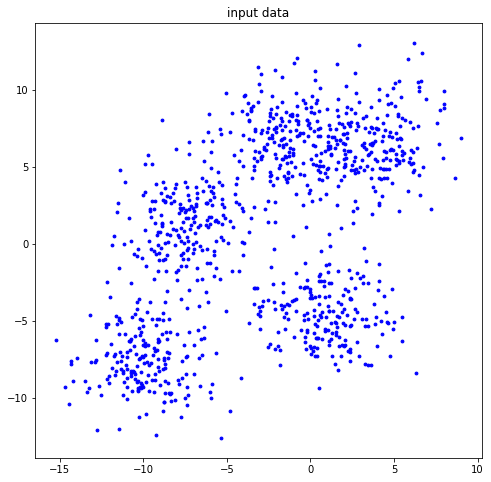

In [12]:
plt.figure(figsize=(8,8))   
plt.title('input data')
plt.scatter(x, y, s = 8, color = 'blue')
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [271]:
def compute_distance(feature, center):
    distance = np.linalg.norm(feature - center, axis = 1)
    
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [181]:
def compute_centroid(feature, label_feature, value_label):
    centroid = np.mean(feature[label_feature == value_label, :], axis = 0)
    
    return centroid

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [182]:
def compute_label(distance):
    index_label_feature = np.argmin(distance, axis = 1)
    
    return index_label_feature


In [544]:
# ===================================================
# assign the number of clusters and iterations
number_cluster      = 10
number_iteration    = 300
label_cluster = 10
# ===================================================

In [565]:
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.random.rand(number_cluster, number_feature)
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))

for i in range(number_iteration):
    distance[:, 0] = compute_distance(feature, centroid[0])
    for k in range(1, number_cluster):
        distance[:, k] = compute_distance(feature, centroid[k])
    label_feature = compute_label(distance)
    
    loss = np.sum(np.min(distance, axis = 1) ** 2) * (1/number_cluster)
    loss_iteration[i] = loss

    for j in range(number_cluster):
        com_centroid = compute_centroid(feature, label_feature, j)
        if np.linalg.norm(com_centroid - centroid) > 0:
            centroid_iteration[i, j, :] = com_centroid
        else:
            centroid_iteration[i, j, :] = centroid[j]
        
    centroid = centroid_iteration[i]

## plot the results

In [13]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    plt.scatter(feature[:, 0], feature[:, 1], s = 8, color = 'blue')
    plt.tight_layout()
    plt.show()

In [500]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    plt.plot(list(range(len(loss_iteration))), loss_iteration, 'r')
    plt.tight_layout()
    plt.show()

In [507]:

def plot_centroid(centroid_iteration):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    # initial
    plt.scatter(centroid_iteration[0][:, 0], centroid_iteration[0][:, 1], c = 'b', label = 'initial')
    # final
    plt.plot(centroid_iteration[len(centroid_iteration)-1][:, 0],
                centroid_iteration[len(centroid_iteration)-1][:, 1], 'rs', label = 'final')
    # movement
    for i in range(centroid_iteration.shape[1]):
        plt.plot(centroid_iteration[:, i][:, 0], centroid_iteration[:, i][:, 1], '-', label = 'cluster = %s '% i)
    plt.legend(loc = 'upper left')
    plt.tight_layout()
    plt.show()

In [401]:
def plot_cluster(feature, label_feature, label_cluster):
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    plt.scatter(feature[:, 0], feature[:, 1], c = label_feature, cmap = plt.cm.get_cmap('rainbow', label_cluster))
    plt.colorbar(ticks = range(label_cluster), label = 'cluster')
    plt.tight_layout()
    plt.show()


***

# results

***

1. plot the input data

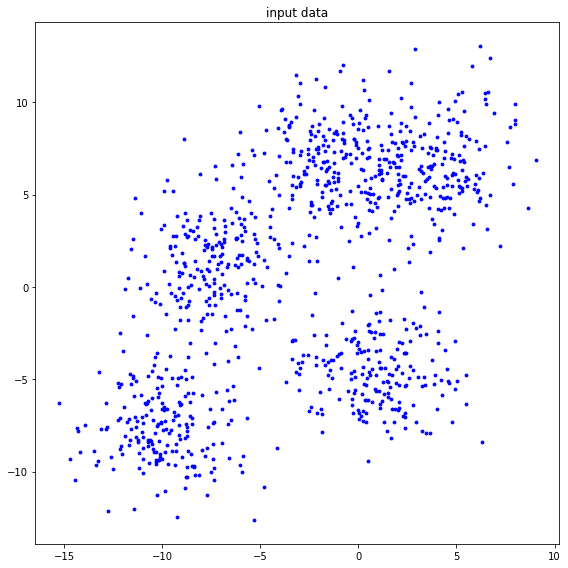

In [513]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

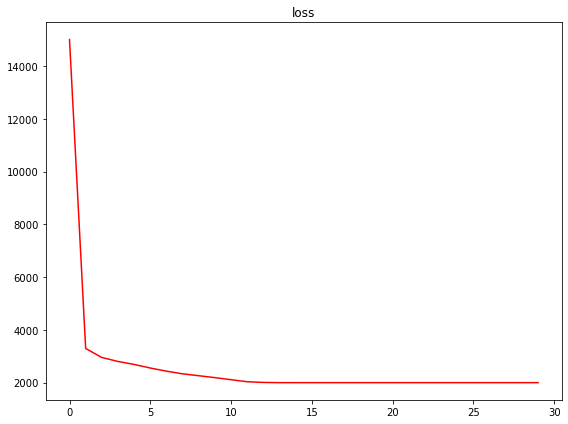

In [512]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

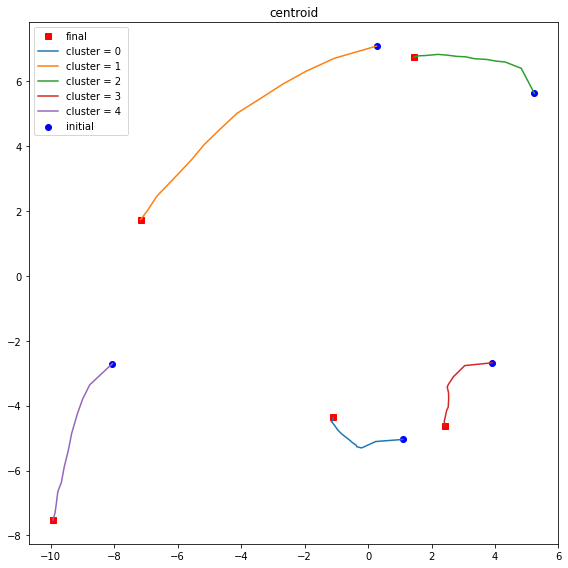

In [511]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

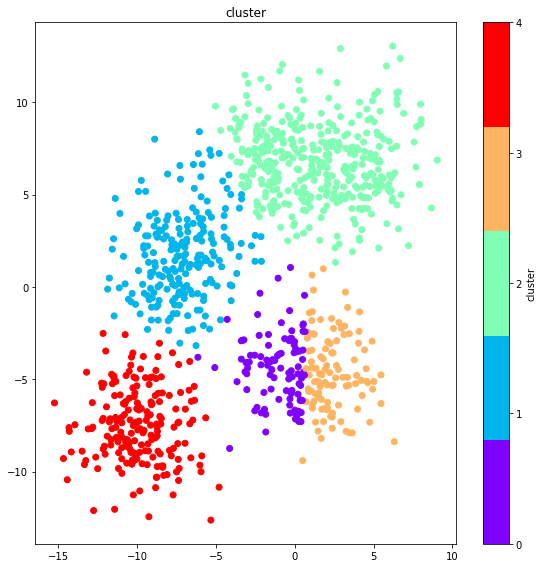

In [510]:
plot_cluster(feature, label_feature, label_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

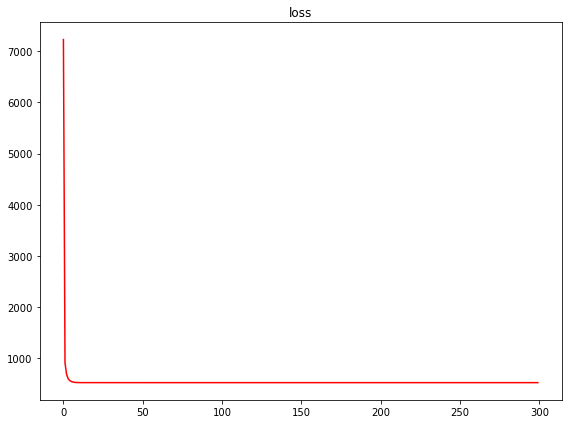

In [566]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

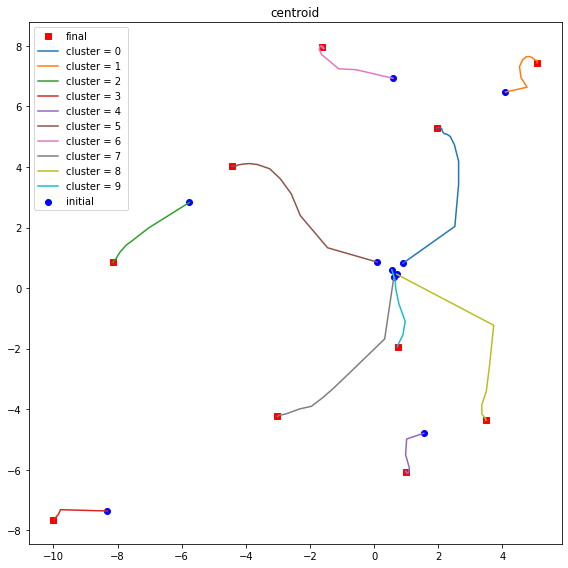

In [567]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

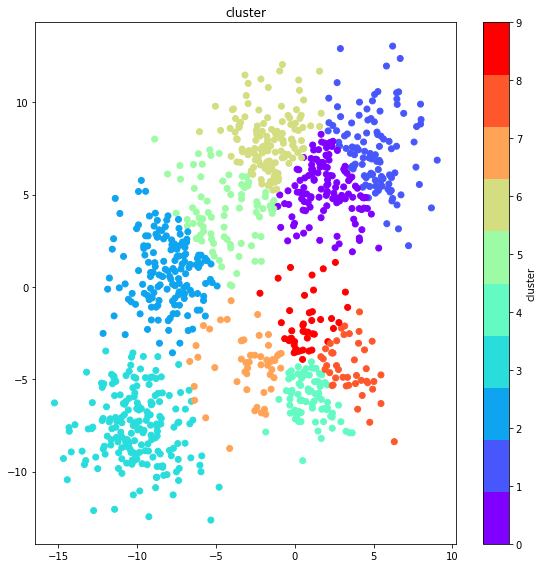

In [568]:
plot_cluster(feature, label_feature, label_cluster)